# Explore here

## Step 1: Problem statement and data collection

Problem statement: Based on other known features about a customer, use ML to determine whether that customer will take out a long-term deposit or not (categorical)

In [ ]:
# Import dataset to start working with it
import pandas as pd

raw_data = pd.read_csv("../data/raw/bank-marketing-campaign-data.csv", sep=";")


## Step 2: Exploration and data cleaning

In [2]:
print(f"Raw data shape: {raw_data.shape}")
print(raw_data.info())

Raw data shape: (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  con

Unlike prior exercise, doesn't look as though any of our columns have missing data at all, which simplifies matters.

I don't see a column for ID in here, and the rest of the data points seem generic enough that it's plausible to me we'd have multiple identical-seeming rows sourced from separate actual people, so am skipping the duplicate-finding-and-dropping step we did for our previous EDA.

In [3]:
print(raw_data.shape)
raw_data.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# remove data considered irrelevant
# raw_data.drop(
#    ["id", "name", "host_name", "last_review", "reviews_per_month"],
#    axis=1,
#    inplace=True,
# )
# skipping this because as of yet, none of the columns in the raw dataset look strictly-irrelevant to me


raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Step 3: Analysis of univariate variables
### categorical variables
Categorical, non-numeric variables in this dataframe include: age, job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome

All of these are plausible to me as relevant.

In [ ]:
categorical_variables = [
    "age",
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "month",
    "day_of_week",
    "poutcome",
]

for each_categorical_variable in categorical_variables:
    print(f"\n\t{each_categorical_variable}s:")
    for each_possible_value in sorted(
        raw_data[f"{each_categorical_variable}"].unique()
    ):
        print(each_possible_value)


	ages:
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
91
92
94
95
98

	jobs:
admin.
blue-collar
entrepreneur
housemaid
management
retired
self-employed
services
student
technician
unemployed
unknown

	maritals:
divorced
married
single
unknown

	educations:
basic.4y
basic.6y
basic.9y
high.school
illiterate
professional.course
university.degree
unknown

	defaults:
no
unknown
yes

	housings:
no
unknown
yes

	loans:
no
unknown
yes

	contacts:
cellular
telephone

	months:
apr
aug
dec
jul
jun
mar
may
nov
oct
sep

	day_of_weeks:
fri
mon
thu
tue
wed

	poutcomes:
failure
nonexistent
success


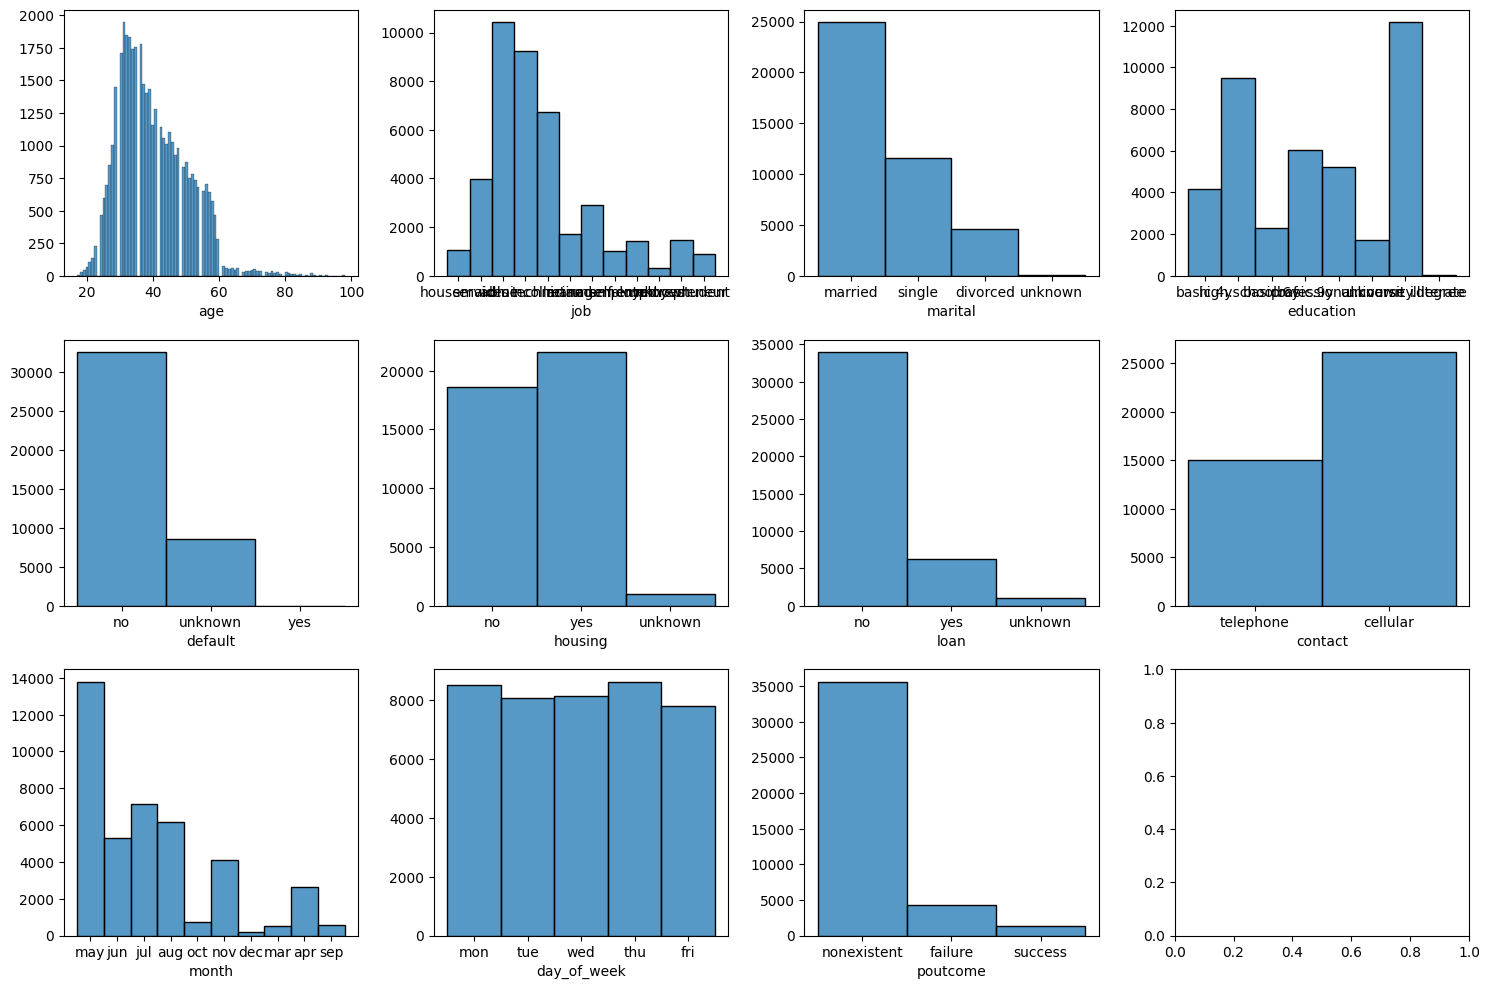

In [7]:
# histogram-plot each categorical variable

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, 4, figsize=(15, 10))

# Create a multiple histogram
sns.histplot(ax=axis[0, 0], data=raw_data, x="age").set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=raw_data, x="job").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=raw_data, x="marital").set(ylabel=None)
sns.histplot(ax=axis[0, 3], data=raw_data, x="education").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=raw_data, x="default").set(ylabel=None)
sns.histplot(ax=axis[1, 1], data=raw_data, x="housing").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=raw_data, x="loan").set(ylabel=None)
sns.histplot(ax=axis[1, 3], data=raw_data, x="contact").set(ylabel=None)
sns.histplot(ax=axis[2, 0], data=raw_data, x="month").set(ylabel=None)
sns.histplot(ax=axis[2, 1], data=raw_data, x="day_of_week").set(ylabel=None)
sns.histplot(ax=axis[2, 2], data=raw_data, x="poutcome").set(ylabel=None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

- seems like no phone campaigning happens in the first couple months of the year
- Most prospective customers were married, not in default, and didn't have a personal loan
- am now realizing that rather than having missing, null, NaN data in various columns, we have some with "unknown" instead.

### numeric variables

Numerical, non-categorical variables in the dataset include: price, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365.  

In [ ]:
numeric_variables = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "calculated_host_listings_count",
    "availability_365",
]
fig, axis = plt.subplots(
    2, len(numeric_variables), figsize=(25, 7), gridspec_kw={"height_ratios": [6, 1]}
)

# Creating a multiple figure with histograms and box plots
temp_column_index = 0
for each_numeric_variable in numeric_variables:
    sns.histplot(
        ax=axis[0, temp_column_index], data=raw_data, x=f"{each_numeric_variable}"
    ).set(xlabel=None, ylabel=None)
    sns.boxplot(
        ax=axis[1, temp_column_index], data=raw_data, x=f"{each_numeric_variable}"
    )
    temp_column_index += 1

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


From this it looks like:
- most units charge under $500 (a night?) but there are some more-expensive outliers
- most places allow a minimum stay of only one night but at least a few outliers look like they're being listed for multi-year contracts
- most places have few if any reviews but the "tail" on that histogram skews longer into the low hundreds
- if I'm correctly understanding "calculated host listings count" then the majority of hosts have only a handful or at most a few dozen listings, whereas there are outliers who've listed dozens to hundreds
- many listings are available either only during a few nights of the year (maybe for popular holidays/events such as New Year's Eve or the Thanksgiving Day Parades?) and there's a noticeable histogram spike at beiung available year-round; the rest are typically available around 225 days a year. 

## Step 4: Analysis of multivariate variables
### Numerical-numerical analysis
I've hypothesized that a more-reviewed property is a more-booked property, that a more-booked property is a more in-demand property, and that a more in-demand property should be listing for a higher price.  Similar could be true of relatiung price to calculated_host_listings_count, if that's an expression of a host having booked more often or more in total.  I'm curious to see how those seem to correlate...

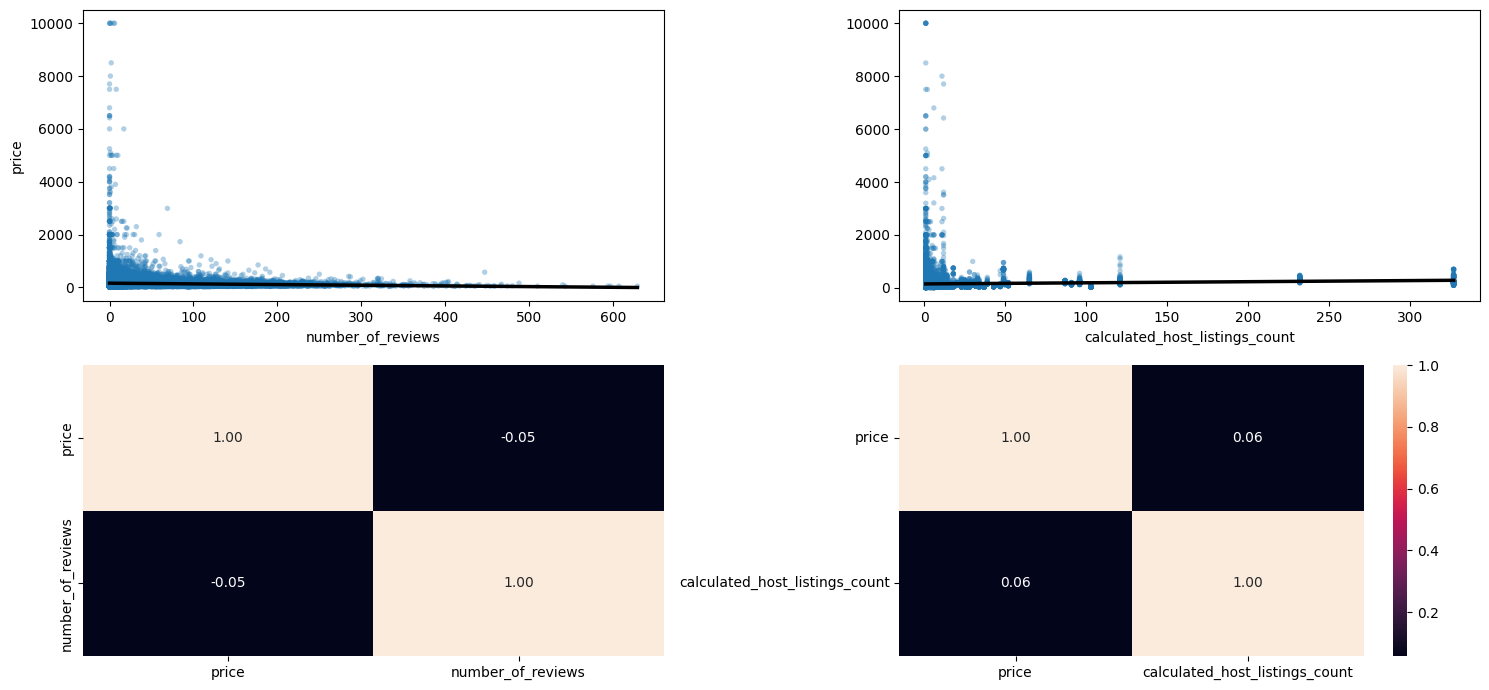

In [ ]:
fig, axis = plt.subplots(2, 2, figsize=(15, 7))

# Create a multiple scatter diagram
common_scatter = {"s": 15, "alpha": 0.35, "edgecolor": "none"}
common_line = {"color": "black", "lw": 2.5, "zorder": 5}

sns.regplot(
    ax=axis[0, 0],
    data=raw_data,
    x="number_of_reviews",
    y="price",
    scatter_kws=common_scatter,
    line_kws=common_line,
)
sns.heatmap(
    raw_data[["price", "number_of_reviews"]].corr(),
    annot=True,
    fmt=".2f",
    ax=axis[1, 0],
    cbar=False,
)

sns.regplot(
    ax=axis[0, 1],
    data=raw_data,
    x="calculated_host_listings_count",
    y="price",
    scatter_kws=common_scatter,
    line_kws=common_line,
).set(ylabel=None)
sns.heatmap(
    raw_data[["price", "calculated_host_listings_count"]].corr(),
    annot=True,
    fmt=".2f",
    ax=axis[1, 1],
)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Based on this it looks like the correlations between quantity of reviews and price are slight, and in the opposite direction of what I'd hypothesized; I'd explain this by thinking that a more-affordable property is more likely to get booked by someone who is both opinionated & outspoken enough to take the time to leave a review.

Meawhile there's a similar-scale positive correlation between listings count and price, so yes, someone who's been putting up more listings typically commands a higher price for them, but not by as much as I might've guessed.

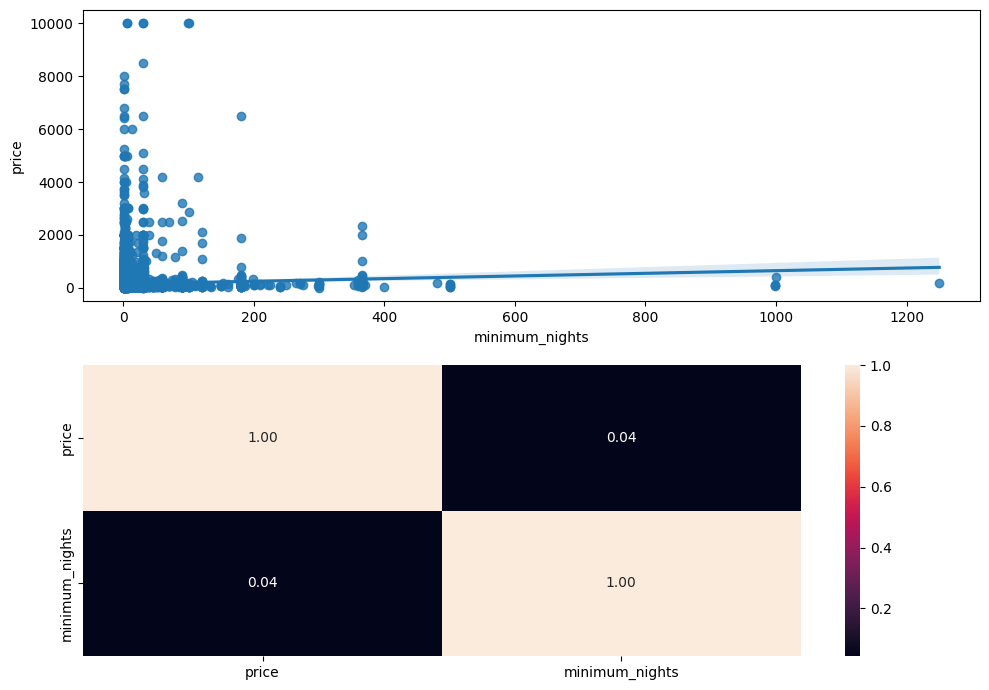

In [ ]:
# I'm curious whether there's a strong correlation or little to no correlation between minimum_nights and price

fig, axis = plt.subplots(2, 1, figsize=(10, 7))

# Create a multiple scatter diagram
sns.regplot(ax=axis[0], data=raw_data, x="minimum_nights", y="price")
sns.heatmap(
    raw_data[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1]
)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Seems like there's even less/weaker of a correlation between minimum nights & price than there was a correlation between price and either of the other two numeric variables discussed above.

### categorical-categorical analysis

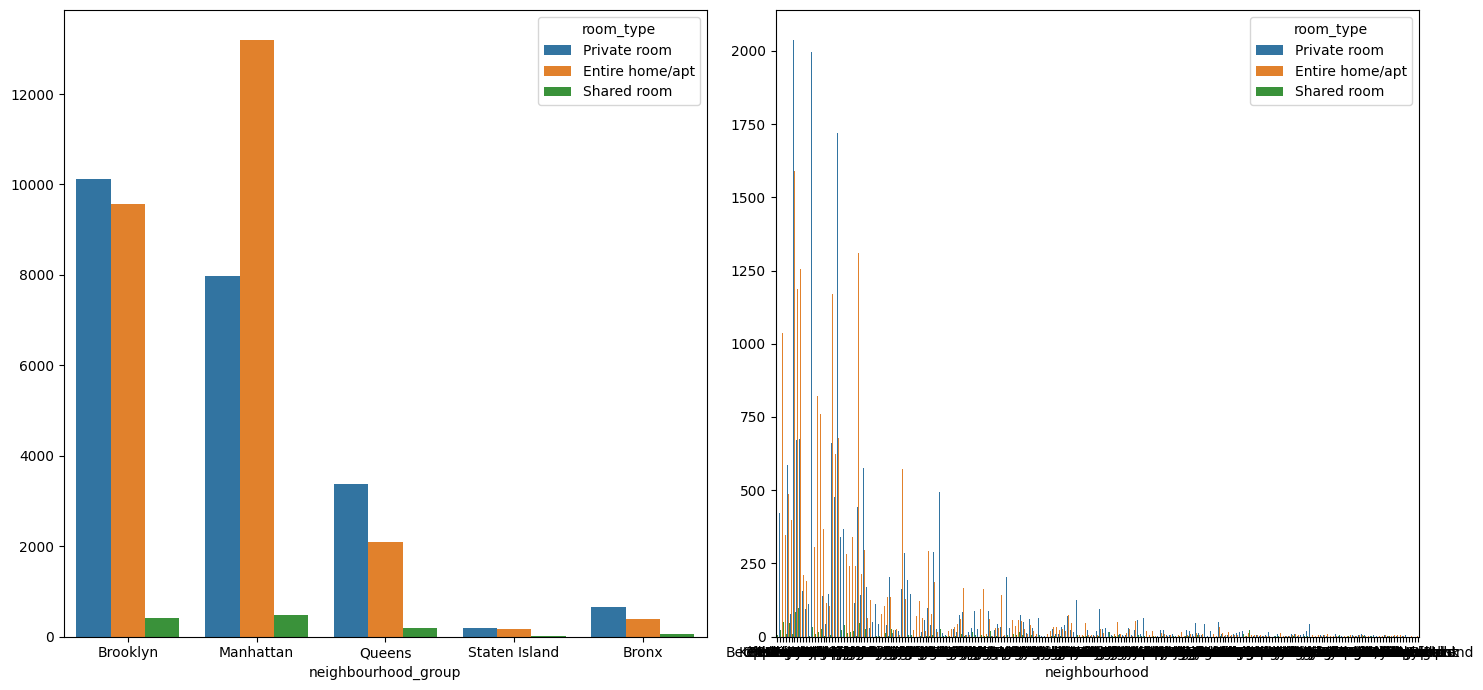

['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type']


In [ ]:
# I'd guess certain home types are more commonly listed in some areas vs. others,
# e.g. in which neighborhoods is it easier or more difficult to find a whole home/apt vs. a private room vs. a shared room?

fig, axis = plt.subplots(1, 2, figsize=(15, 7))

sns.countplot(ax=axis[0], data=raw_data, x="neighbourhood_group", hue="room_type").set(
    ylabel=None
)
sns.countplot(ax=axis[1], data=raw_data, x="neighbourhood", hue="room_type").set(
    ylabel=None
)


plt.tight_layout()

plt.show()


print(categorical_variables)

#### Correlation analysis
Seems reasonable to guess that price would be affected both by neighborhood group and room type...

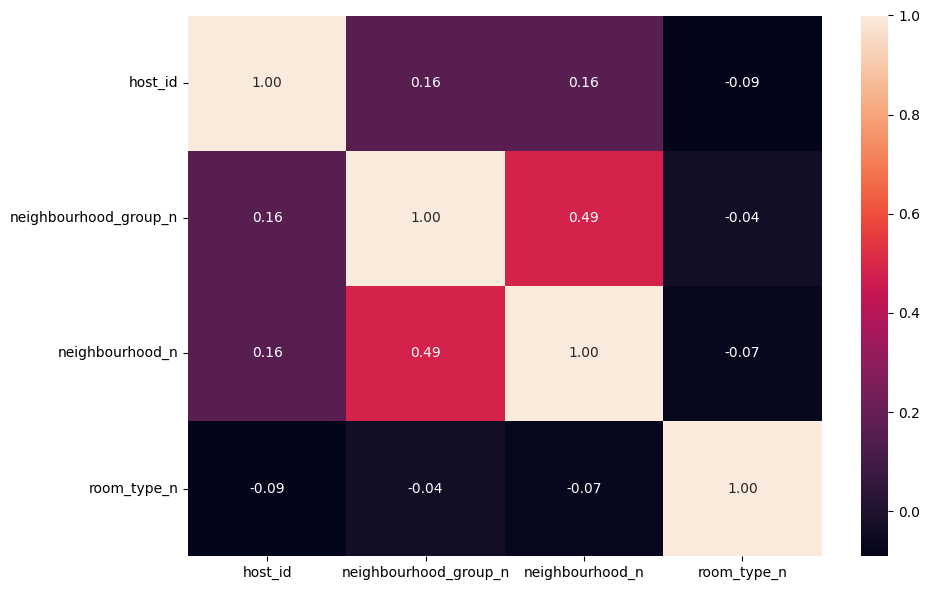

In [ ]:
raw_data["neighbourhood_group_n"] = pd.factorize(raw_data["neighbourhood_group"])[0]
raw_data["neighbourhood_n"] = pd.factorize(raw_data["neighbourhood"])[0]

# some room types are more luxurious than others; can express this by not just minimally factorizing by first appearance
room_order = ["Shared room", "Private room", "Entire home/apt"]
raw_data["room_type_cat"] = pd.Categorical(
    raw_data["room_type"],
    categories=room_order,
    ordered=True,  # the most important difference beteen this and the factorize one-liners
)
raw_data["room_type_n"] = raw_data["room_type_cat"].cat.codes


fig, axis = plt.subplots(figsize=(10, 6))

sns.heatmap(
    raw_data[
        ["host_id", "neighbourhood_group_n", "neighbourhood_n", "room_type_n"]
    ].corr(),
    annot=True,
    fmt=".2f",
)

plt.tight_layout()

plt.show()

Based on the above, looks like theres an unsurprisingly-strong correlation between neighbourhood & what neighbourhood group it's in, and some correlation between who's hosting & which neighborhood(s) they host in, but less correlation than I would've guessed between either of those & room type.

### numerical-categorical analysis

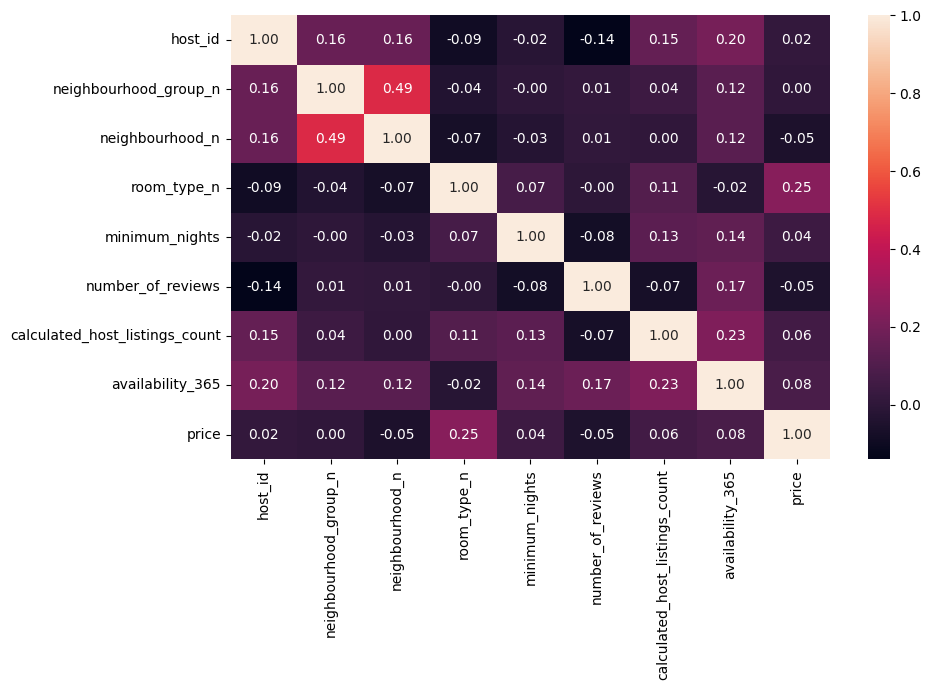

In [ ]:
fig, axis = plt.subplots(figsize=(10, 7))

sns.heatmap(
    raw_data[
        [
            "host_id",
            "neighbourhood_group_n",
            "neighbourhood_n",
            "room_type_n",
            "minimum_nights",
            "number_of_reviews",
            "calculated_host_listings_count",
            "availability_365",
            "price",
        ]
    ].corr(),
    annot=True,
    fmt=".2f",
)

plt.tight_layout()

plt.show()

Based on the above, I'd assess:
- the strongest determinant of price is room type, rather than location; neighborhood location has a surprising-to-me lack of influence on price
- the strongest determinants of room availability (proportionally throughout the year) are who's hosting it (some people appear more ready/willing/able to host than others), and to a slightly-lesser but still notable extent, neighborhood.
- more-available rooms tended to get booked more times (not surprising) and to a slightly leser but still-noticeable extent, tended to get more reviewed.

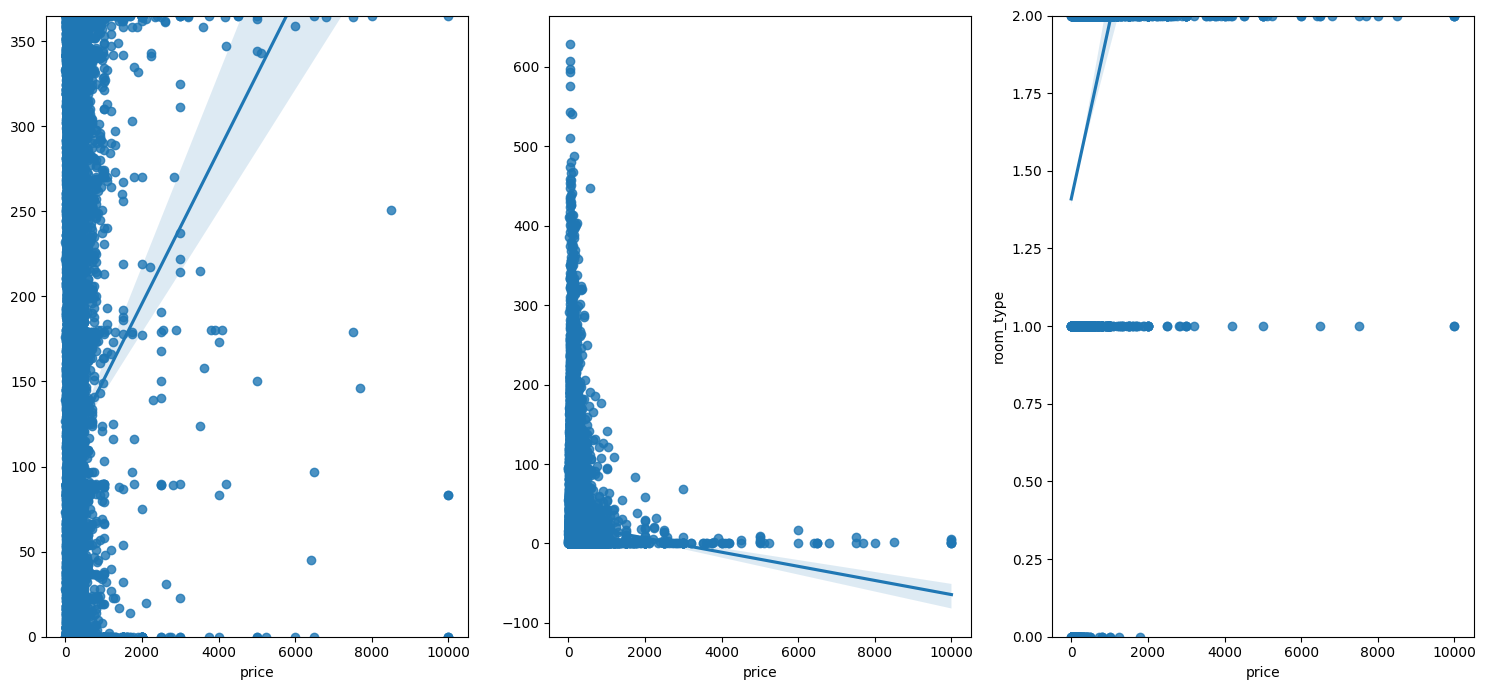

In [ ]:
fig, axis = plt.subplots(figsize=(15, 7), ncols=3)

sns.regplot(ax=axis[0], data=raw_data, x="price", y="availability_365").set(
    ylabel=None, ylim=(0, 365)
)
sns.regplot(ax=axis[1], data=raw_data, x="price", y="number_of_reviews").set(
    ylabel=None
)
sns.regplot(ax=axis[2], data=raw_data, x="price", y="room_type_n").set(
    ylabel="room_type", ylim=(0, 2)
)

plt.tight_layout()

plt.show()

Based on these regression plots:
- higher-cost listings tend to be available for more days of the year than lower-cost listings
- lower-cost listings tend to have more reviews written about them
- higher-end room types (e.g. whole-home instead of shared room) unsurprisingly tend to be higher-priced

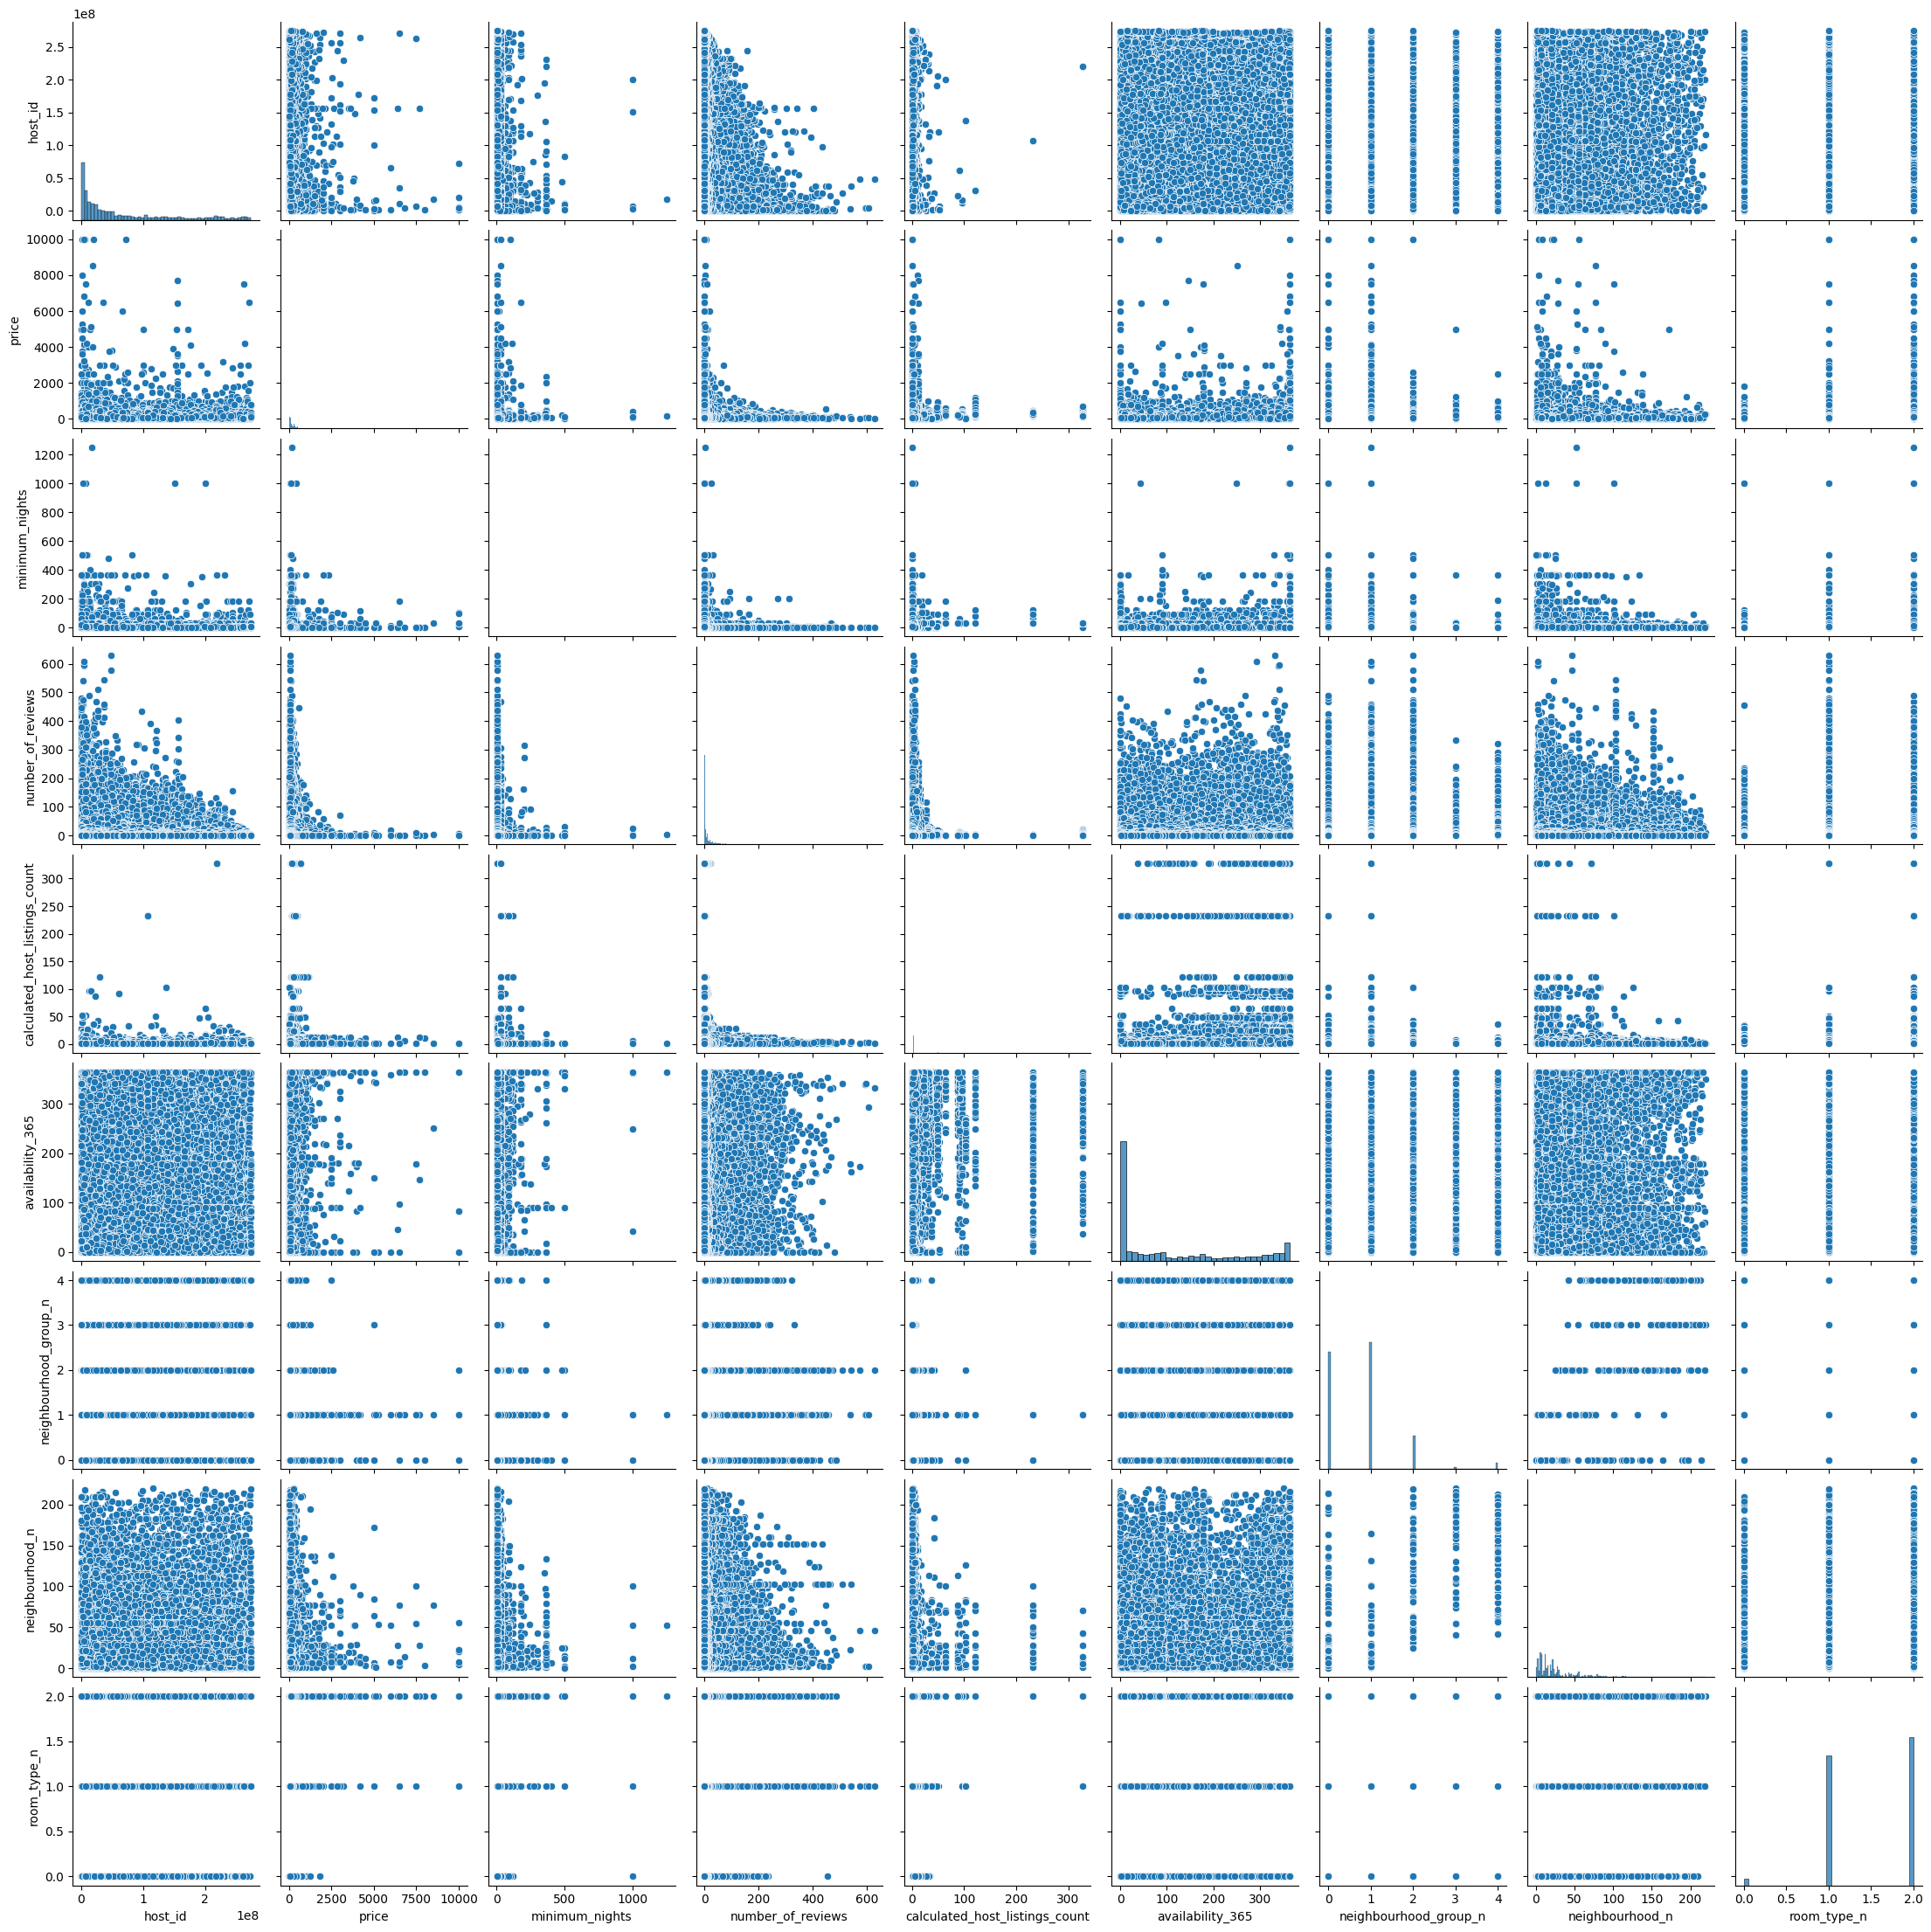

In [ ]:
sns.pairplot(data=raw_data)

### Day 2 exercises


In [ ]:
raw_data.describe()

,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,152.720687,7.029962,23.274466,7.143982,112.781327,0.786911,29.888782,1.495940
std,7.861097e+07,240.154170,20.510550,44.550582,32.952519,131.622289,0.844386,34.676634,0.545379
min,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.822033e+06,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,7.500000,1.000000
50%,3.079382e+07,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,19.000000,2.000000
75%,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,37.000000,2.000000
max,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000,4.000000,220.000000,2.000000


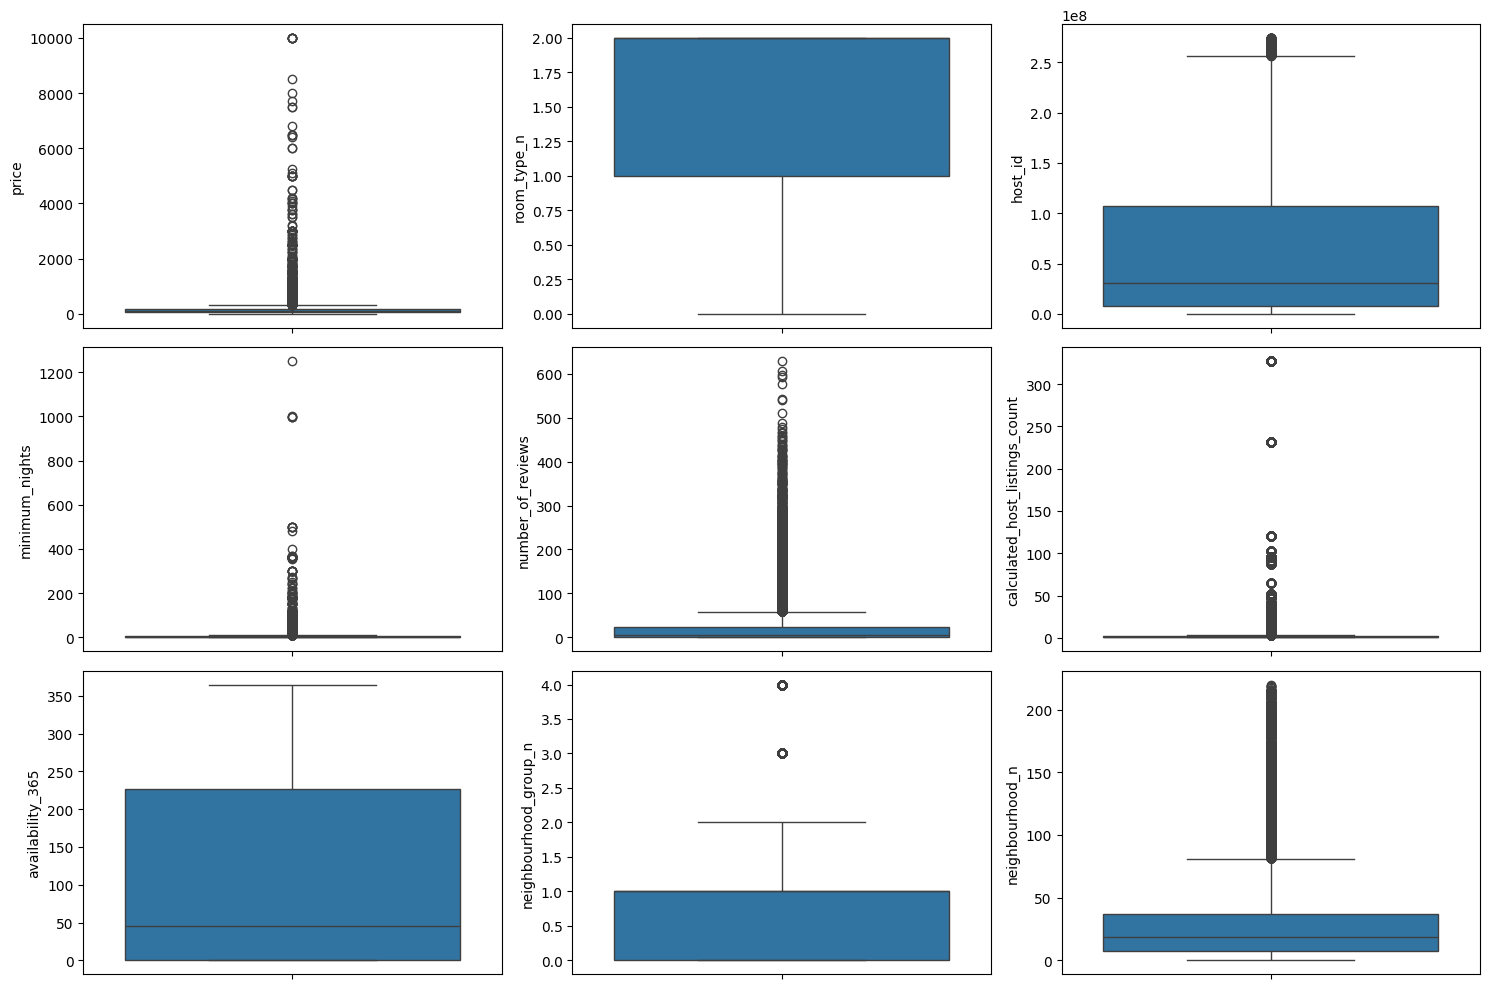

In [ ]:
fig, axis = plt.subplots(3, 3, figsize=(15, 10))

sns.boxplot(ax=axis[0, 0], data=raw_data, y="price")
sns.boxplot(ax=axis[0, 1], data=raw_data, y="room_type_n")
sns.boxplot(ax=axis[0, 2], data=raw_data, y="host_id")
sns.boxplot(ax=axis[1, 0], data=raw_data, y="minimum_nights")
sns.boxplot(ax=axis[1, 1], data=raw_data, y="number_of_reviews")
sns.boxplot(ax=axis[1, 2], data=raw_data, y="calculated_host_listings_count")
sns.boxplot(ax=axis[2, 0], data=raw_data, y="availability_365")
sns.boxplot(ax=axis[2, 1], data=raw_data, y="neighbourhood_group_n")
sns.boxplot(ax=axis[2, 2], data=raw_data, y="neighbourhood_n")

plt.tight_layout()

plt.show()

Items affected by outliers: price, minimum_nights, number_of_reviews, calculated_host_listings_count, neighbourhood_group, neighbourhood.

Maintain-eliminate-replace decisions: Most of these I'd keep.  The first exception is that I'd recommend eliminating rows for which minimum_nights is >1 or >2 years.  At that point landlords are using AirBnB to effectively sublet out a whole-year or multi-year rental property to a tenant, which seems like a different-enough business model vs. BnB that it's no longer an apples-to-apples comparison.

On talking about this more with a classmate he convinced me it's worth treating some of the higher-priced units as outliers, so I picked a threshold for that to remove those, too.

In [ ]:
print(raw_data["minimum_nights"].describe())
outlier_threshold_in_days = 365
long_stays = raw_data.query(f"minimum_nights > {outlier_threshold_in_days}")
print(long_stays)
raw_data = raw_data.query(
    f"minimum_nights <= {outlier_threshold_in_days}"
)  # to drop the outlier rows

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64
         host_id neighbourhood_group       neighbourhood        room_type  \
1305     2798644            Brooklyn            Bushwick  Entire home/apt   
2854     6676776           Manhattan   Battery Park City  Entire home/apt   
5767    17550546           Manhattan   Greenwich Village  Entire home/apt   
7355     3680008              Queens    Long Island City  Entire home/apt   
8014    10720264           Manhattan              Harlem  Entire home/apt   
10829   43945071              Queens    Long Island City  Entire home/apt   
11193    8996336            Brooklyn       Crown Heights     Private room   
13404    2697686           Manhattan              Harlem  Entire home/apt   
14285    2228137            Brooklyn          Kensington     Private room   
15946   16476167 

In [ ]:
print(raw_data["price"].describe())
outlier_thrshold_price = 6000
expensive_places = raw_data.query(f"price > {outlier_thrshold_price}")
print(expensive_places)
raw_data = raw_data.query(
    f"price <= {outlier_thrshold_price}"
)  # to drop the outlier rows

count    48875.000000
mean       151.516215
std        213.987115
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max       8500.000000
Name: price, dtype: float64
         host_id neighbourhood_group      neighbourhood        room_type  \
3774    11598359            Brooklyn       Clinton Hill  Entire home/apt   
4377     1177497            Brooklyn       Clinton Hill  Entire home/apt   
29662  156158778           Manhattan    Upper East Side  Entire home/apt   
29664  156158778           Manhattan    Upper East Side  Entire home/apt   
30268   18128455           Manhattan            Tribeca  Entire home/apt   
37194   35303743           Manhattan    Upper West Side     Private room   
42523    7407743           Manhattan  Battery Park City  Entire home/apt   
44034    3750764           Manhattan            Chelsea  Entire home/apt   
45666  262534951            Brooklyn      East Flatbush     Private room   
48043  271248669           Manhattan

#### Feature scaling
##### Splitting training vs test data

In [ ]:
from sklearn.model_selection import train_test_split

num_variables = [
    "room_type_n",
    "host_id",
    "minimum_nights",
    "number_of_reviews",
    "calculated_host_listings_count",
    "availability_365",
    "neighbourhood_group_n",
    "neighbourhood_n",
]


# We divide the dataset into training and test samples
X = raw_data.drop("price", axis=1)[num_variables]
y = raw_data["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.head()

,room_type_n,host_id,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n
4162,1,13795689,2,24,1,318,1,30
45906,2,221200420,30,0,23,311,1,5
24179,1,136646834,2,19,1,0,1,30
37892,2,12211018,2,3,1,0,0,3
40069,2,6096884,3,4,1,87,1,27


In [ ]:
# normalization scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=num_variables)

X_train_norm.head()

,room_type_n,host_id,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n
4162,-0.910919,-0.684950,-0.294568,0.012900,-0.187651,1.563750,0.248831,-0.000903
45906,0.922925,1.954619,1.401318,-0.523392,0.476839,1.510461,0.248831,-0.718295
24179,-0.910919,0.878535,-0.294568,-0.098827,-0.187651,-0.857081,0.248831,-0.000903
37892,0.922925,-0.705117,-0.294568,-0.456356,-0.187651,-0.857081,-0.930906,-0.775687
40069,0.922925,-0.782930,-0.234001,-0.434010,-0.187651,-0.194778,0.248831,-0.086990


In [ ]:
# min-max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index=X_train.index, columns=num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index=X_test.index, columns=num_variables)

X_train_scal.head()

,room_type_n,host_id,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n
4162,0.5,0.050282,0.002747,0.038156,0.000000,0.871233,0.25,0.136986
45906,1.0,0.806353,0.079670,0.000000,0.067485,0.852055,0.25,0.022831
24179,0.5,0.498122,0.002747,0.030207,0.000000,0.000000,0.25,0.136986
37892,1.0,0.044505,0.002747,0.004769,0.000000,0.000000,0.00,0.013699
40069,1.0,0.022217,0.005495,0.006359,0.000000,0.238356,0.25,0.123288


In [ ]:
# feature selection for selecting most-relevant features to use for building ML model

from sklearn.feature_selection import f_classif, SelectKBest

# With a value of k = 5 we implicitly mean that we want to remove 3 features from the 8-column dataset
selection_model = SelectKBest(f_classif, k=5)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(
    selection_model.transform(X_train), columns=X_train.columns.values[ix]
)
X_test_sel = pd.DataFrame(
    selection_model.transform(X_test), columns=X_test.columns.values[ix]
)

X_train_sel.head()

,room_type_n,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_n
0,1,2,1,318,30
1,2,30,23,311,5
2,1,2,1,0,30
3,2,2,1,0,3
4,2,3,1,87,27


In [ ]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)

In [ ]:
X_train_sel.to_csv(
    "../data/interim/clean_nyc_airbnb_train.csv",
    index=False,
)
X_test_sel.to_csv("../data/interim/clean_nyc_airbnb_test.csv", index=False)